In [1]:
##Data exploration by Tom ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cust_db = pd.read_csv('master_data/Anagrafica_ClubQ8.csv', sep=';',decimal = ',', index_col='COD_PAN_DA_POS',parse_dates=['DATA_NASCITA'])

cust_db.head()

,SEX,DATA_NASCITA,REGIONE,PROVINCIA,COMUNE,TIPO_CARTA,DATA_BATTESIMO,SALDO_PUNTI
COD_PAN_DA_POS,,,,,,,,
7071161603018922195,M,1951-09-14,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0
7071161603005992565,F,1988-09-15,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0
7071161603025867243,F,1943-09-09,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0
7071161603021997861,M,1974-03-01,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0
7071161603025554049,M,1963-11-22,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0


In [2]:
cust_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656137 entries, 7071161603018922195 to 7071161603012594909
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   SEX             1656136 non-null  object        
 1   DATA_NASCITA    1656137 non-null  datetime64[ns]
 2   REGIONE         1534328 non-null  object        
 3   PROVINCIA       1534328 non-null  object        
 4   COMUNE          1534328 non-null  object        
 5   TIPO_CARTA      1656137 non-null  object        
 6   DATA_BATTESIMO  1655941 non-null  object        
 7   SALDO_PUNTI     1627207 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 113.7+ MB


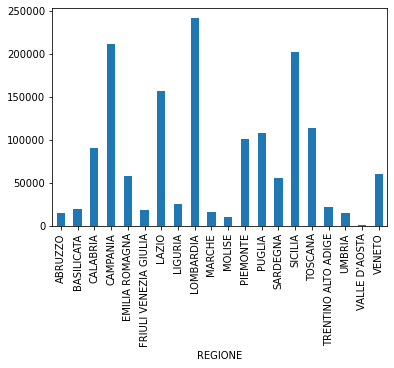

In [3]:
## Where are customers located in Italy?
cust_regions = cust_db.groupby(['REGIONE']).size().plot(kind = "bar")

## More elegantly: could work with Matplotlib

<AxesSubplot:ylabel='SEX'>

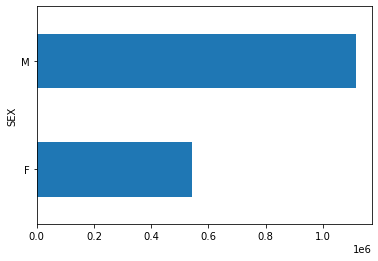

In [4]:
# Gender distribution across our customers

cust_gender = cust_db.groupby(['SEX']).size().plot(kind = 'barh')

# Only shows the absolute number of customers for each gender: what if we want a percentage?

cust_gender_perc = cust_db.groupby(['SEX']).size().transform(lambda x: x/sum(x))

cust_gender_perc.plot(kind = 'barh')

<AxesSubplot:xlabel='TIPO_CARTA'>

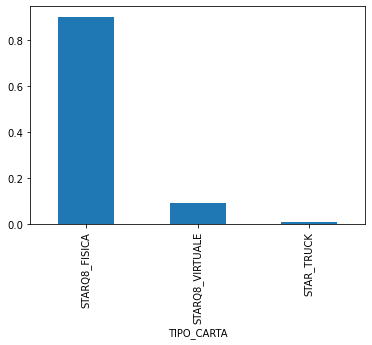

In [5]:
#Distribution of the type of cards

cust_card = cust_db.groupby(['TIPO_CARTA']).size().transform(lambda x: x/sum(x))
cust_card.plot(kind = 'bar')

/Users/tomrigal/opt/miniconda3/envs/gbac/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALDO_PUNTI', ylabel='Density'>

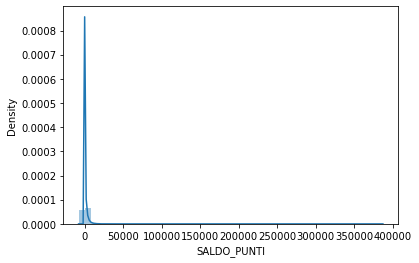

In [6]:
# Summary of the amount of points of each customer


cust_db['SALDO_PUNTI'].describe()

#We can represent them in a distribution plot using Seaborn

sns.distplot(cust_db['SALDO_PUNTI'])
#doesn't work as numerical transformation is needed for our numbers